# Exploratory Data Analysis(EDA)


## I. Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('heart_raw.csv')

In [3]:
df.head(5)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape


(918, 12)

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Check value 0 because it could be missing value

In [9]:
numeric_cols = ["Age","RestingBP", "Cholesterol", "MaxHR"]
zero_counts = (df[numeric_cols] == 0).sum()
print("Number of 0 values ​​in each column:")
print(zero_counts)


Number of 0 values ​​in each column:
Age              0
RestingBP        1
Cholesterol    172
MaxHR            0
dtype: int64


### There are 172 zero values ​​in the Cholesterol column and 1 zero in the RestingBP column (nonsense)

In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("heart_raw.csv")

median_bp = df.loc[df["RestingBP"] > 0, "RestingBP"].median()
df["RestingBP"] = df["RestingBP"].replace(0, median_bp)

print(f"Fill RestingBP=0 as median = {median_bp}")

df["Cholesterol"] = df["Cholesterol"].replace(0, np.nan)

categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

imputer= KNNImputer(n_neighbors=5)
df_imputed= pd.DataFrame(imputer.fit_transform(df_encoded),columns=df_encoded.columns)

df_imputed["Age"]= df_imputed["Age"].round().astype(int)
df_imputed["RestingBP"]= df_imputed["RestingBP"].round().astype(int)
df_imputed["MaxHR"]= df_imputed["MaxHR"].round().astype(int)
df_imputed["FastingBS"]= df_imputed["FastingBS"].round().astype(int)
df_imputed["HeartDisease"]= df_imputed["HeartDisease"].round().astype(int)

df_imputed.to_csv("heart_final.csv", index=False)

print("✅ Dataset: heart_final.csv")


Fill RestingBP=0 as median = 130.0
✅ Dataset: heart_final.csv


### Fill RestingBP column with Median and Cholesterol column with KNNImputer

### Check again


In [11]:
df = pd.read_csv("heart_final.csv")
# Chỉ xét các cột số
numeric_cols = ["Age","RestingBP", "Cholesterol", "MaxHR"]

# Đếm số lượng giá trị 0 trong mỗi cột
zero_counts = (df[numeric_cols] == 0).sum()

print("Number of 0 values ​​in each column:")
print(zero_counts)


Number of 0 values ​​in each column:
Age            0
RestingBP      0
Cholesterol    0
MaxHR          0
dtype: int64


In [14]:
df[["Age", "RestingBP", "Cholesterol", "MaxHR"]].describe()


,Age,RestingBP,Cholesterol,MaxHR
count,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,244.997386,136.809368
std,9.432617,17.990127,54.642887,25.460334
min,28.000000,80.000000,85.000000,60.000000
25%,47.000000,120.000000,212.000000,120.000000
50%,54.000000,130.000000,239.700000,138.000000
75%,60.000000,140.000000,272.300000,156.000000
max,77.000000,200.000000,603.000000,202.000000


## II. Visualization

### Histogram

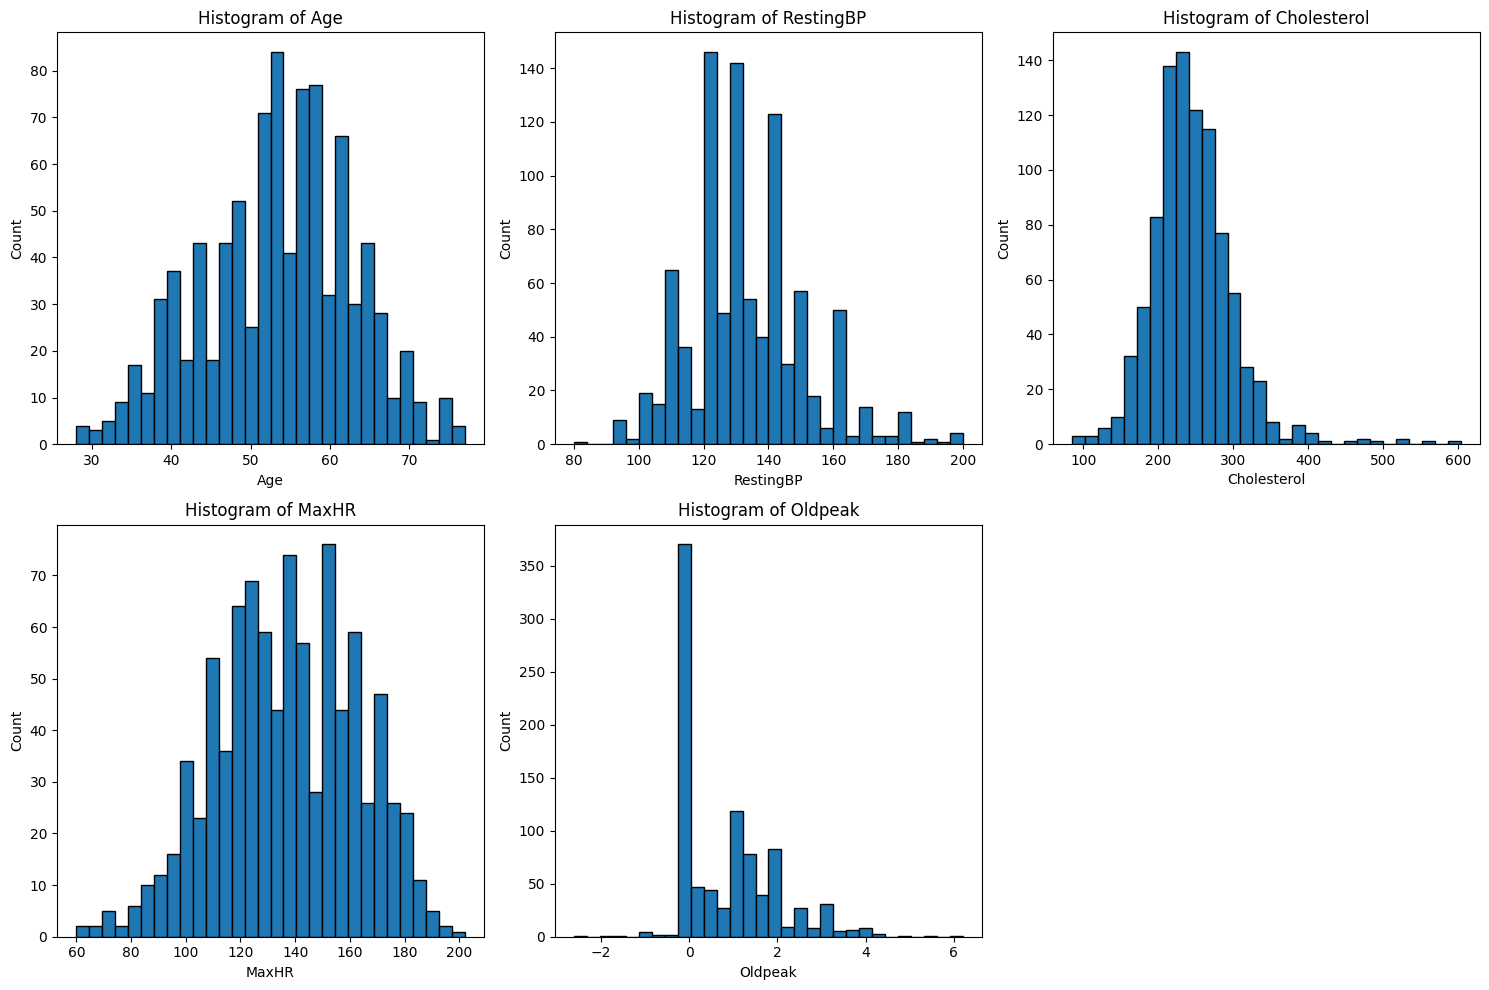

In [ ]:
num_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

n = len(num_cols)
ncols = 3
nrows = int(np.ceil(n / ncols))

plt.figure(figsize=(15, 10))
for i, c in enumerate(num_cols, 1):
    ax = plt.subplot(nrows, ncols, i)
    ax.hist(df[c].dropna(), bins=30, edgecolor="black")
    ax.set_title(f"Histogram of {c}")
    ax.set_xlabel(c)
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


### 2. Bar chart

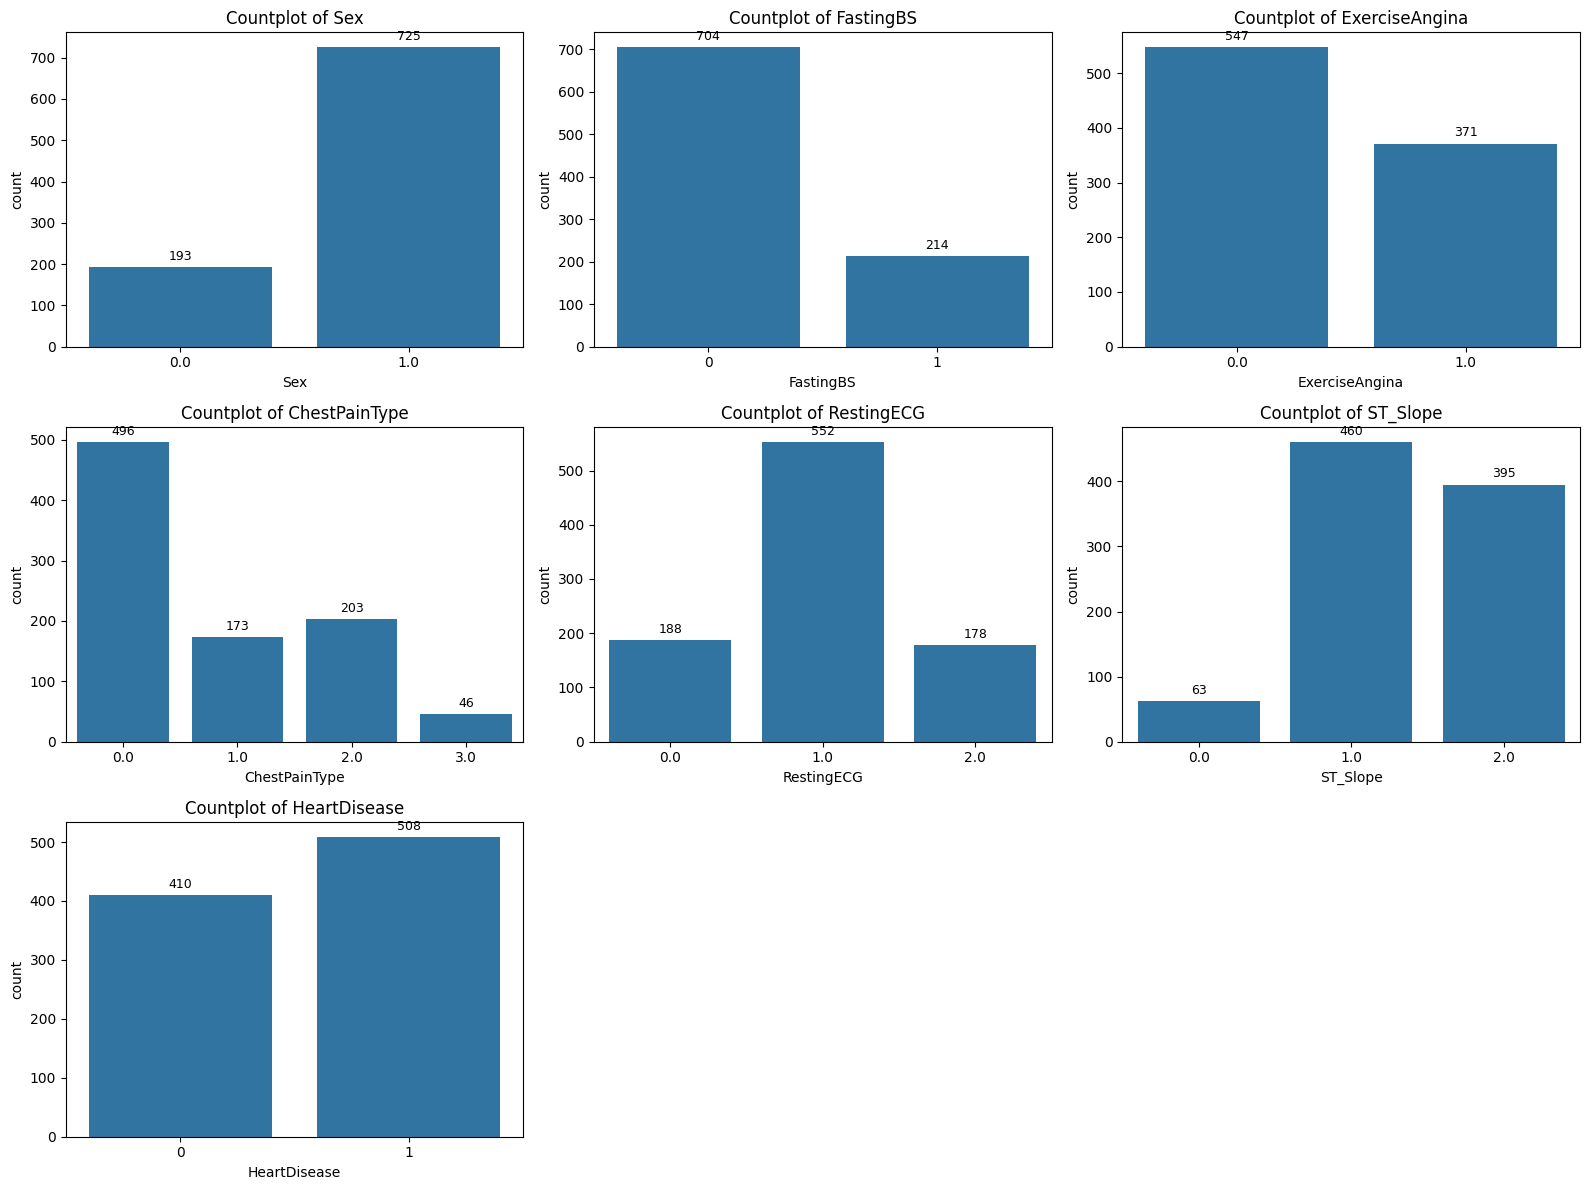

In [ ]:
cat_cols = ["Sex", "FastingBS", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope", "HeartDisease"]

n = len(cat_cols)
ncols = 3
nrows = int(np.ceil(n / ncols))

plt.figure(figsize=(16, 12))
for i, c in enumerate(cat_cols, 1):
    ax = plt.subplot(nrows, ncols, i)
    sns.countplot(x=c, data=df, ax=ax)
    ax.set_title(f"Countplot of {c}")
    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), 
                    ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()


### 3. Box plot

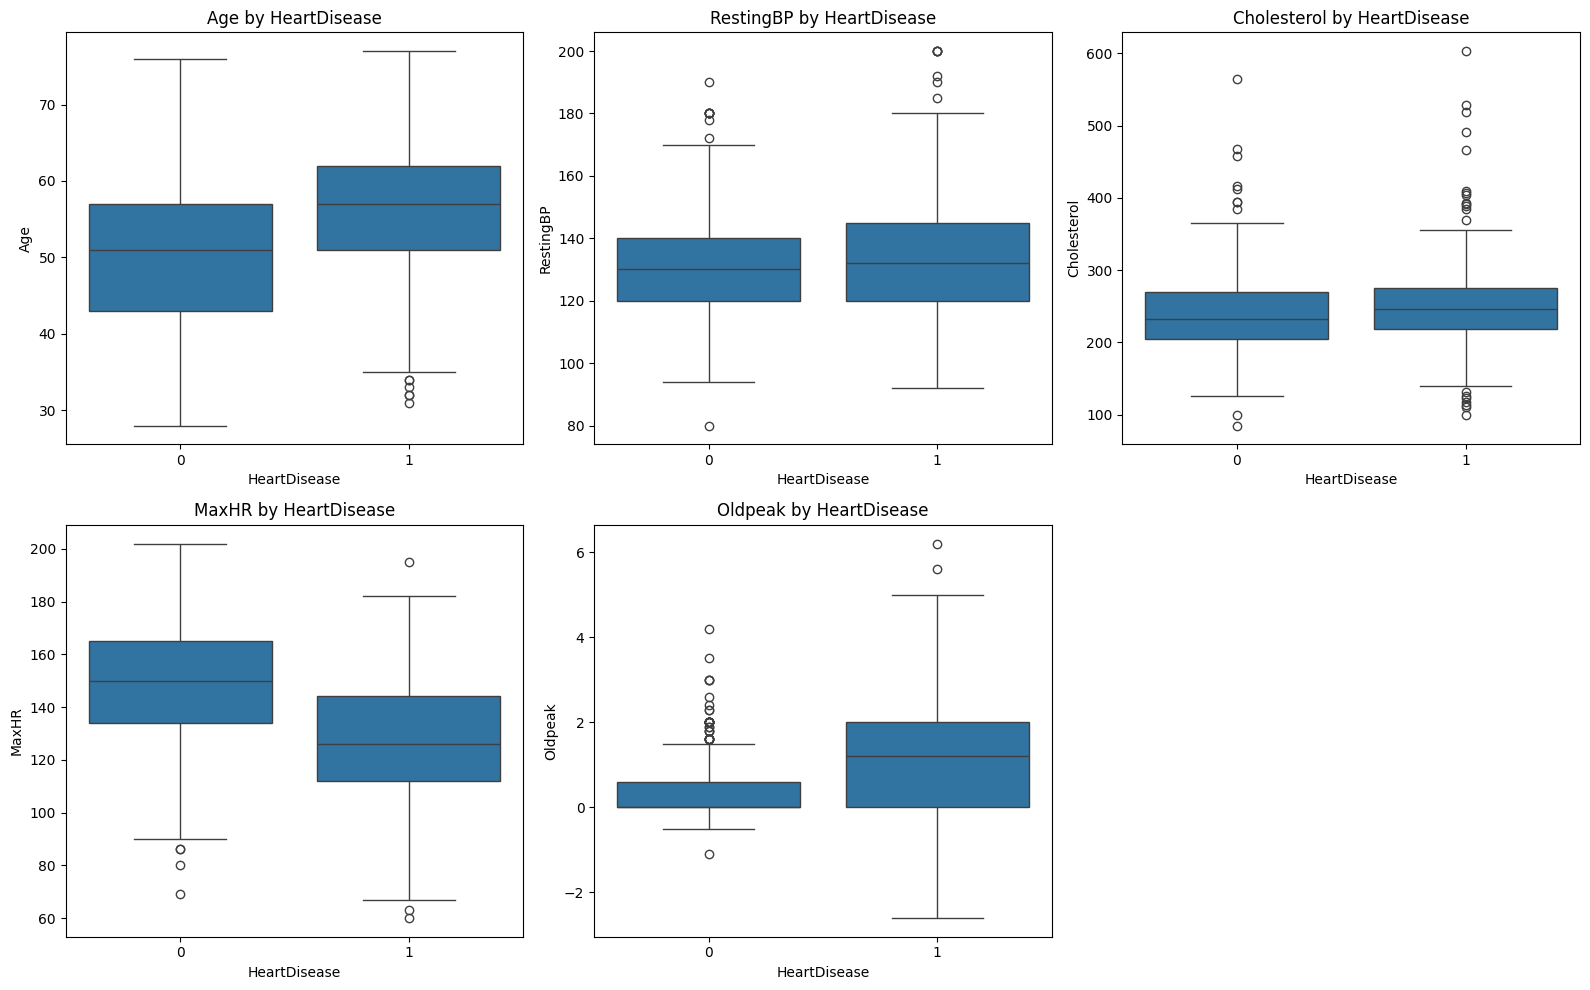

In [ ]:
target = "HeartDisease"
num_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

n = len(num_cols)
ncols = 3
nrows = int(np.ceil(n / ncols))

plt.figure(figsize=(16, 10))
for i, c in enumerate(num_cols, 1):
    ax = plt.subplot(nrows, ncols, i)
    sns.boxplot(x=target, y=c, data=df, ax=ax)
    ax.set_title(f"{c} by {target}")
plt.tight_layout()
plt.show()


### 3. KDE plot

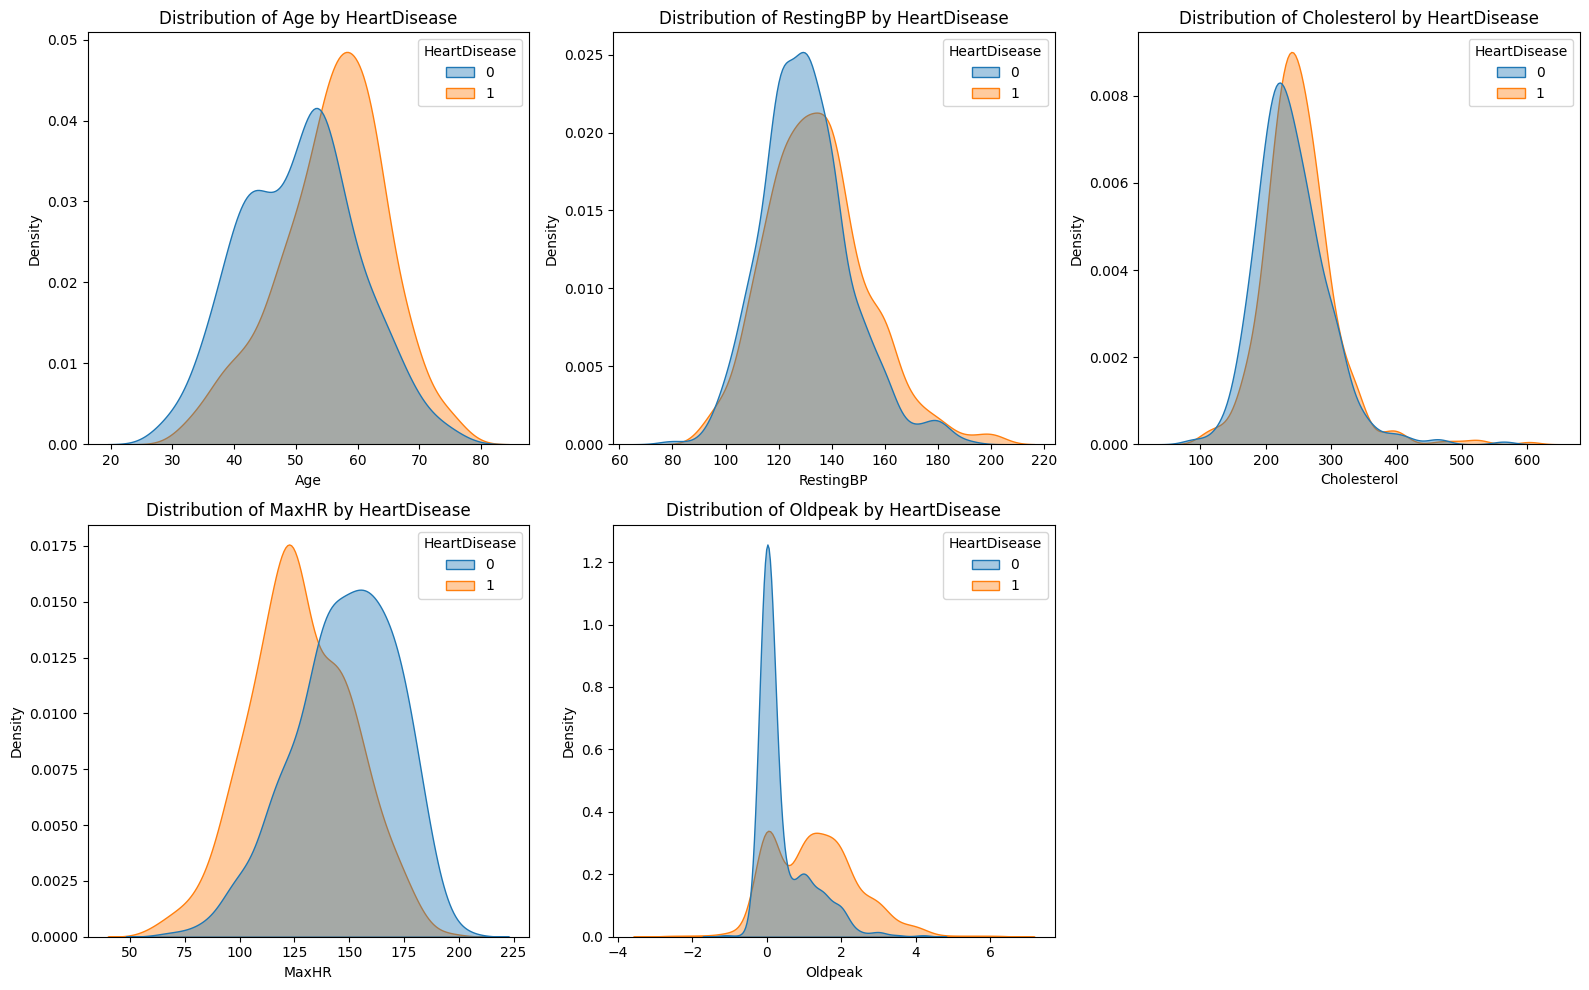

In [ ]:
num_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

n = len(num_cols)
ncols = 3
nrows = int(np.ceil(n / ncols))

plt.figure(figsize=(16, 10))
for i, c in enumerate(num_cols, 1):
    ax = plt.subplot(nrows, ncols, i)
    sns.kdeplot(data=df, x=c, hue=target, common_norm=False, fill=True, alpha=0.4, ax=ax)
    ax.set_title(f"Distribution of {c} by {target}")
plt.tight_layout()
plt.show()


### 4. Heat map

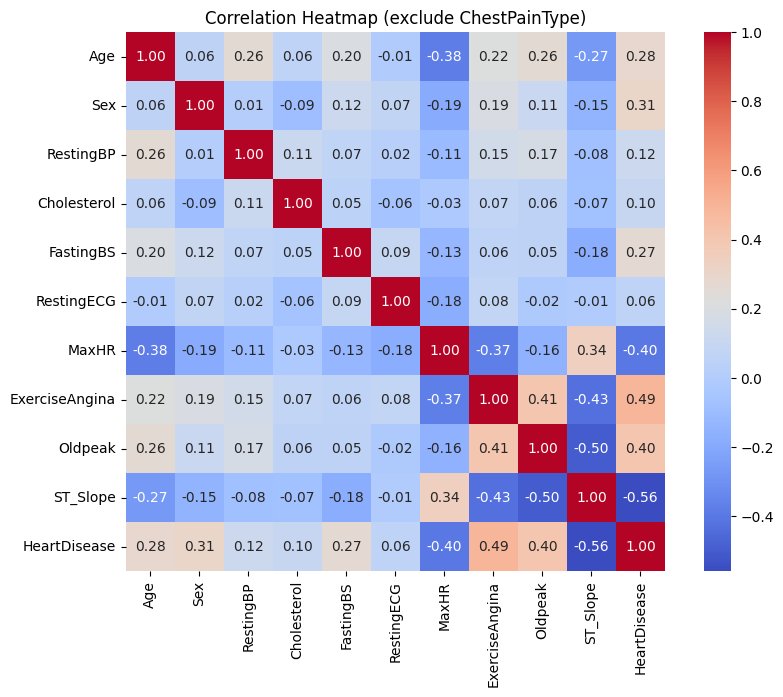

In [ ]:
corr_cols = [c for c in df.columns if c != "ChestPainType"]
corr = df[corr_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap (exclude ChestPainType)")
plt.show()
